![](./img/logo.png)

# Ejemplo H: Regresión Lineal - MultiVariable

$Sci-Kit Learn$ es un poderoso módulo de Python para el aprendizaje de máquina. 
Contiene funciones de regresión, clasificación, agrupación, selección de modelos y reducción de la dimensionalidad. 

El ejemplo se utilizará el módulo <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">sklearn.linear_model</a> que contiene 
"métodos destinados a la regresión en los que se espera que el "Target Value" 
sea una combinación lineal de las variables de entrada".



In [58]:
import pandas as pd 
import seaborn as sns
from datetime import datetime
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as stats


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
datap1 = pd.read_csv("./data/dataR.csv")
datap1.shape

(1493, 7)

In [5]:
datap1['Date'] = pd.to_datetime(datap1['Date'])
datap1.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883


In [6]:
#Se asigna 'Date' como indice
datap1.set_index('Date', inplace=True)
#Se cambia el orden del DataFrame, los más recientes al final
datap1.sort_values('Date', ascending=True)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,3.991400e+09,1132.989990
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,2.491020e+09,1136.520020
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,4.972660e+09,1137.140015
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,5.270680e+09,1141.689941
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,4.389590e+09,1144.979980
...,...,...,...,...,...,...
2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883
2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117


Generar características del modelo:
    
- ['High']- ['Low'] => porcentaje de cambio: ['H_L_pct']
- 5 períodos Promedio móvil exponencial: ['ewm_5']
- Desviación estándar del precio en los últimos 5 días: ['std_price_5']
- Variación porcentual del volumen diario: ['pct_Vol_Diario']
- Volumen medio de los últimos 5 días: ['ave_Volum_5']
- Volumen sobre la relación de precios de cierre: ['Volumen_Close']

In [14]:
datap1['H_L_pct'] = (datap1['High'] - datap1['Low']).pct_change()
datap1['Prom_Exp_5'] = datap1['Close'].ewm(span=5).mean().shift(periods=1)
datap1['std_price_5'] = datap1['Close'].rolling(center=False, window=5).std().shift(periods=1)
datap1['pct_Vol_Diario'] = datap1['Volume'].pct_change()
datap1['ave_Volum_5'] = datap1['Volume'].rolling(center=False, window=5).mean().shift(periods=1)
datap1['Volumen_Close'] = datap1['Volume'].rolling(center=False, window=5).std().shift(periods=1)
datap1.head(7)

,Open,High,Low,Close,Volume,Adj Close,H_L_pct,Prom_Exp_5,std_price_5,pct_Vol_Diario,ave_Volum_5,Volumen_Close
Date,,,,,,,,,,,,
2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,0.802043,2077.070068,NaN,0.042309,NaN,NaN
2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,0.001172,2085.841992,NaN,0.021728,NaN,NaN
2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,-0.363191,2068.684262,NaN,-0.082631,NaN,NaN
2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,-0.247413,2073.181111,NaN,-0.060375,NaN,NaN
2015-11-30,2090.949951,2093.810059,2080.409912,2080.409912,4.245030e+09,2080.409912,-0.344421,2084.486090,19.877589,0.143559,4.045596e+09,2.328943e+08
2015-11-27,2088.820068,2093.290039,2084.129883,2090.110107,1.466840e+09,2090.110107,-0.316414,2082.996599,19.806136,-0.654457,4.085838e+09,2.493154e+08


In [22]:
datap2 = datap1.columns[-7:]
print(datap2)

Index(['Adj Close', 'H_L_pct', 'Prom_Exp_5', 'std_price_5', 'pct_Vol_Diario',
       'ave_Volum_5', 'Volumen_Close'],
      dtype='object')


In [27]:
df = datap1.filter(['Date', 'Adj Close', 'H_L_pct', 'Prom_Exp_5', 'std_price_5', 'pct_Vol_Diario',
       'ave_Volum_5', 'Volumen_Close'])
df.shape

(1493, 7)

In [29]:
df = df.dropna()
df.shape

(1488, 7)

In [30]:
df.head()

,Adj Close,H_L_pct,Prom_Exp_5,std_price_5,pct_Vol_Diario,ave_Volum_5,Volumen_Close
Date,,,,,,,
2015-11-30,2080.409912,-0.344421,2084.486090,19.877589,0.143559,4.045596e+09,2.328943e+08
2015-11-27,2090.110107,-0.316414,2082.996599,19.806136,-0.654457,4.085838e+09,2.493154e+08
2015-11-25,2088.870117,-0.268577,2085.515175,19.599946,0.944957,3.536224e+09,1.181180e+09
2015-11-24,2089.139893,2.556754,2086.678895,9.333599,0.361729,3.245514e+09,1.121578e+09
2015-11-23,2086.590088,-0.403266,2087.521137,7.956808,-0.076436,3.232372e+09,1.111591e+09


## 3.- Visualización de los Datos (Selección de Variables Independientes $features$)
- Dispersión par por variables
- Gráfica de Distribución (Baja distribución "no ayuda a la predición de $Target$")
- Gráfica de Matriz de Correlación (relación con la variable $Target$)

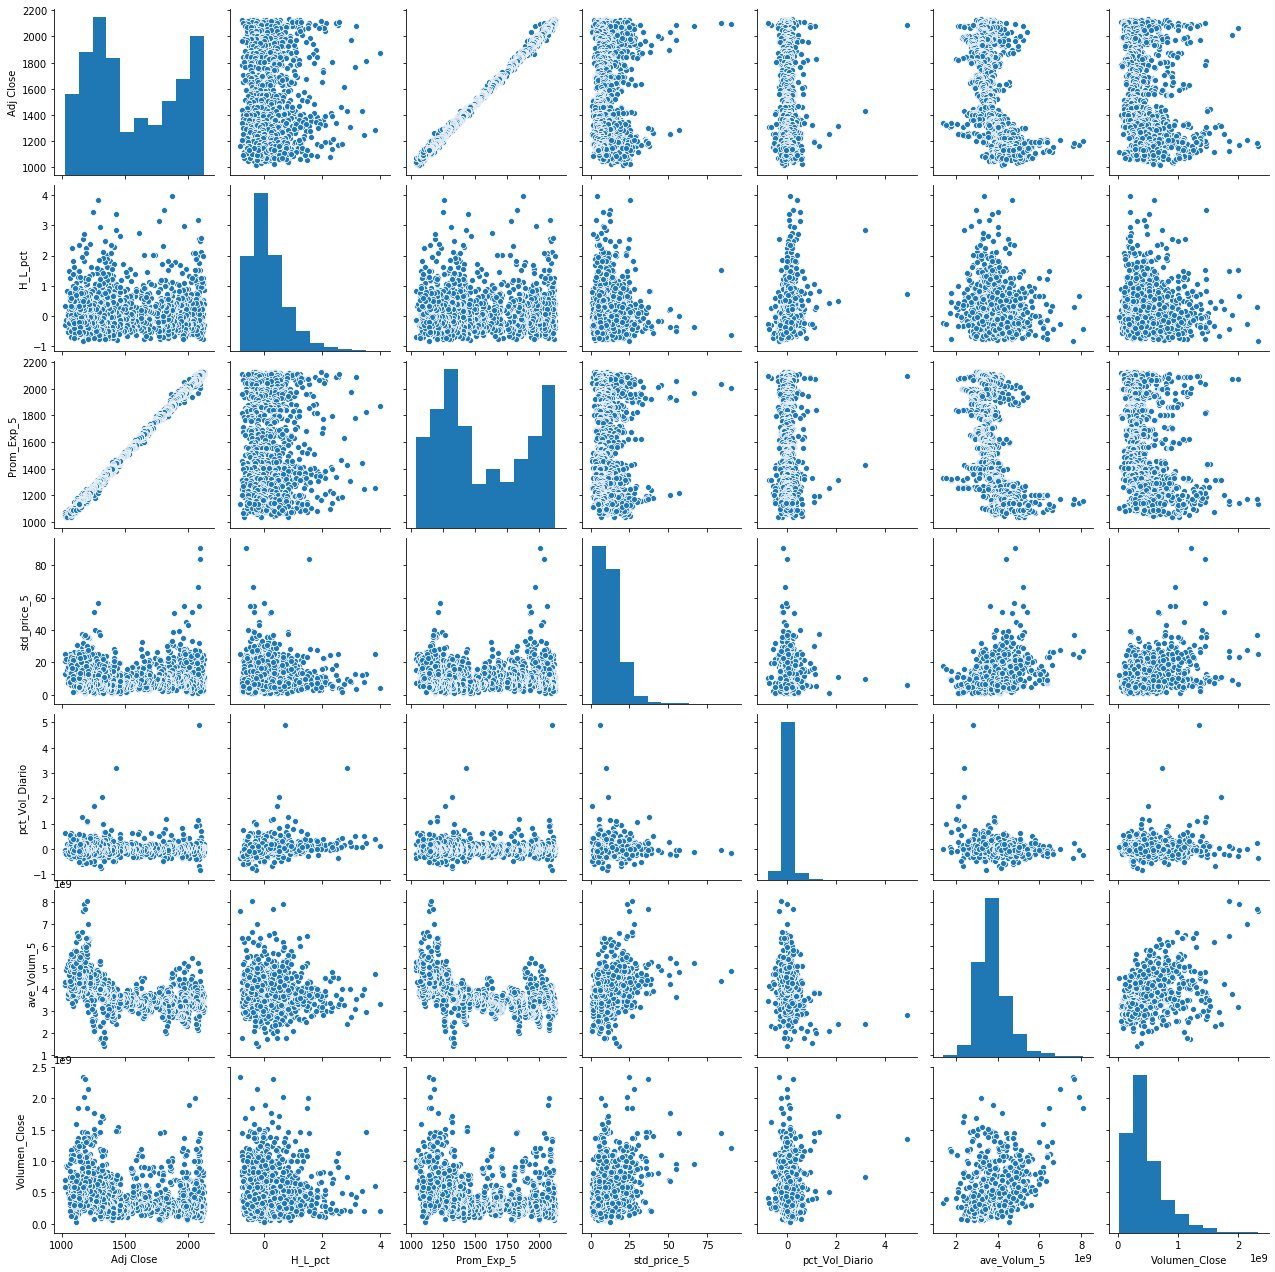

In [31]:
sns.pairplot(df)

In [32]:
matrixCorrelacion = df.corr()
matrixCorrelacion

,Adj Close,H_L_pct,Prom_Exp_5,std_price_5,pct_Vol_Diario,ave_Volum_5,Volumen_Close
Adj Close,1.000000,-0.009709,0.998511,0.071823,-0.004785,-0.485734,-0.241898
H_L_pct,-0.009709,1.000000,-0.005598,-0.046621,0.287960,-0.053194,0.007177
Prom_Exp_5,0.998511,-0.005598,1.000000,0.057072,-0.001695,-0.494565,-0.248638
std_price_5,0.071823,-0.046621,0.057072,1.000000,-0.021690,0.330249,0.309986
pct_Vol_Diario,-0.004785,0.287960,-0.001695,-0.021690,1.000000,-0.154935,0.069344
ave_Volum_5,-0.485734,-0.053194,-0.494565,0.330249,-0.154935,1.000000,0.351998
Volumen_Close,-0.241898,0.007177,-0.248638,0.309986,0.069344,0.351998,1.000000


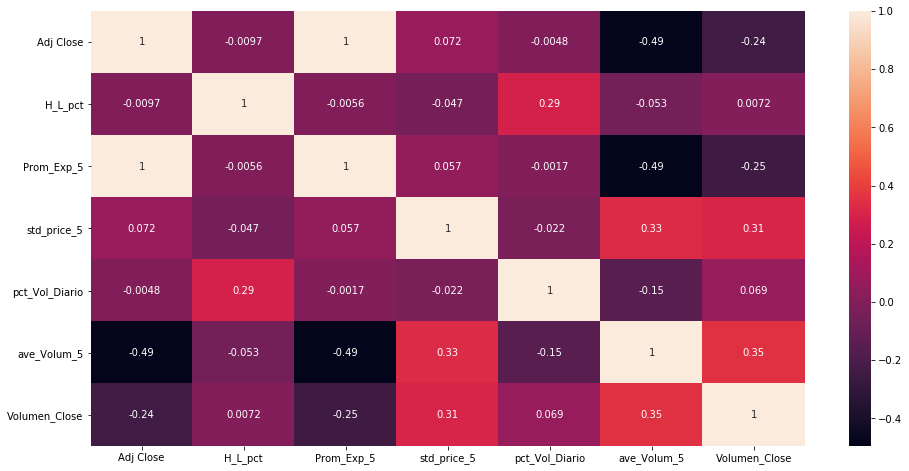

In [33]:
fig, ax = plt.subplots(figsize = (16,8))
sns.heatmap(matrixCorrelacion, annot = True)

### Sección de funciones

In [34]:
def relacionFeature(corrdata, umbral):
    feature= []
    valor  = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index]) > umbral:
            feature.append(index)
            valor.append(corrdata[index])
            
    df = pd.DataFrame(data = valor, index = feature, columns=['Valor de Correlación'])
    return df

total_features = []
total_nombre_features = []
valor_correlacion_sel = []
r2_valores = []
mae_valores = []
mse_valores =[]

def metricas_rendimiento(features, umb, y_true, y_pred):
    puntuacion = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    total_features.append(len(features.columns)-1)
    total_nombre_features.append(features.columns.tolist())
    valor_correlacion_sel.append(umb)
    r2_valores.append(puntuacion)
    mae_valores.append(mae)
    mse_valores.append(mse)
    
    df_metricas = pd.DataFrame(data=[total_nombre_features,total_features,valor_correlacion_sel, 
                                     r2_valores, mae_valores, mse_valores  ]
                                  , index = ['Nombre $Features$', '# $Features$', 'valCorr', 'r2_score', 'MAE', 'MSE'])
    return df_metricas.T

def obten_y_predict(data_Corr):
    X = data_Corr.drop(labels= ['Adj Close'], axis=1)
    y = data_Corr['Adj Close']
    
    X_train, X_test, y_train, t_test = train_test_split(X,y, test_size=0.2, random_state=0)
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    y_predict = modelo.predict(X_test)
    
    return y_predict

In [36]:
# Se fija el primer umbral
umbral = 0.04
valorCorrelacion = relacionFeature(matrixCorrelacion['Adj Close'], umbral)
valorCorrelacion

,Valor de Correlación
Adj Close,1.000000
Prom_Exp_5,0.998511
std_price_5,0.071823
ave_Volum_5,-0.485734
Volumen_Close,-0.241898


## 4.- A continuación se ajustará el modelo de regresión lineal y predecir.
Para estimar los coeficientes se usará el método de <a href="https://www.varsitytutors.com/hotmath/hotmath_help/spanish/topics/line-of-best-fit">Mínimos Cuadrados.</a>. 


### X = dataF.drop['target'] (o variables independientes)
### Y = dataF['target']

In [44]:
#DataFrame con valores de umbral 40% de correlación
df_Um40 = df[valorCorrelacion.index]

X = df_Um40.drop('Adj Close', axis=1)
y = df_Um40['Adj Close']

### División Valores en bloques de Entrenamiento y Prueba
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
# Selección a modelo lineal
modelo = LinearRegression()
# Entrenar el model0
modelo.fit(x_train, y_train)

y_pred_train   = modelo.predict(x_train)
y_predict  = modelo.predict(x_test)

In [47]:
## Visualización de coeficientes por variable

estimate = pd.DataFrame(zip(X.columns, modelo.coef_), columns=['features', 'coeficientesE'])
estimate

,features,coeficientesE
0,Prom_Exp_5,1.000595e+00
1,std_price_5,5.342464e-01
2,ave_Volum_5,1.955048e-09
3,Volumen_Close,7.376296e-10


In [51]:
# dataCorrAcept de arriba (dataframe con los features del umbral aceptado o buscado)
metricas_rendimiento(df_Um40, umbral, y_test, y_predict)

,Nombre $Features$,# $Features$,valCorr,r2_score,MAE,MSE
0,"[Adj Close, Prom_Exp_5, std_price_5, ave_Volum...",4,0.04,0.997458,13.132,304.687


In [69]:
y_test.shape

(298,)

In [75]:
# Diferencia entre 'Predicted' y valor actual
dfPredict = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
dfPredict.tail()

,Actual,Predicted
Date,,
2015-10-05,1987.050049,1999.493595
2012-11-23,1409.150024,1401.802908
2013-04-25,1585.160034,1588.034710
2014-08-20,1986.510010,1985.995447
2012-11-02,1414.199951,1407.187877


In [52]:
predictiones = modelo.predict(X)
predictiones

array([2087.10819786, 2085.67043528, 2087.69320293, ..., 1137.00852427,
       1135.85959605, 1134.12832768])

Text(0.5, 1.0, 'Residual Plot')

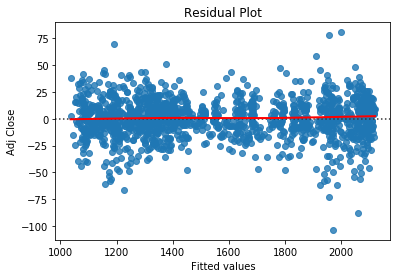

In [56]:
### Grafico de residuos frente a los valores ajustados
## Es útil para validar el supuesto de la linealidad, dibujando una gráfica de dispersión 
## entre los valores ajustados y los residuales.
## Si el gráfico representa cualquier patrón específico o regular, 
## se supone que la relación entre la variable objetivo y los predictores 
## es de naturaleza no lineal, es decir, que existe una no linealidad. 
## Y ningún patrón en la curva es un signo de linealidad entre las características 
## seleccionadas y la variable objetivo.

sns.residplot(predictiones.reshape(-1), 'Adj Close', data=df_Um40, lowess=True, 
             line_kws={'color':'red','lw':2, 'alpha':1})
plt.xlabel('Fitted values')
plt.title('Residual Plot')

In [57]:
### Grafico QQ 
## Este gráfico muestra si los residuos (errores) se distribuyen normalmente o no. 
## Si los puntos se encuentran cerca de la línea normal (Diagonal), 
## se supone que los residuos se distribuyen normalmente.

residuales = df_Um40['Adj Close'] - predictiones.reshape(-1)
residuales

Date
2015-11-30   -6.698286
2015-11-27    4.439672
2015-11-25    1.176914
2015-11-24    6.379352
2015-11-23    3.755411
                ...   
2010-01-08    8.628459
2010-01-07    4.866457
2010-01-06    0.131491
2010-01-05    0.660424
2010-01-04   -1.138338
Name: Adj Close, Length: 1488, dtype: float64

Text(0.5, 1.0, 'Normal Q-Q Plot')

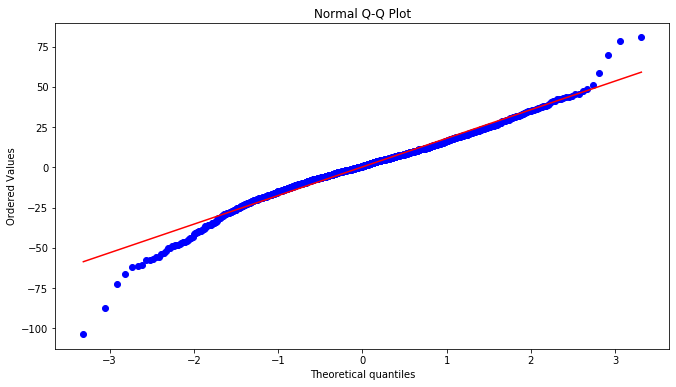

In [63]:
plt.figure(figsize=(11,6))
stats.probplot(residuales, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

Text(0.5, 1.0, 'Scale Location Plot')

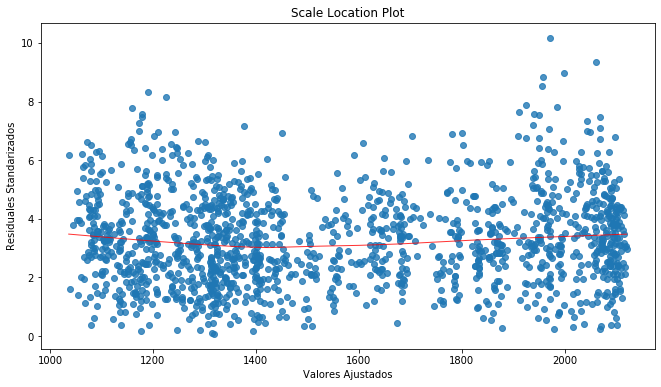

In [65]:
### Gráfica de escala y ubicación (Scale-Location)
## Generalmente, se utiliza para adivinar la homoscedasticidad de los residuos. 
## Es una gráfica de residuos estandarizados de raíz cuadrada contra el valor ajustado. 
## Si no muestra un patrón específico, entonces el modelo de regresión ajustado 
## mantiene la suposición de homoscedasticidad.

raiz_cua_modelo_resid = np.sqrt(np.abs(residuales))

plt.figure(figsize=(11,6))
sns.regplot(predictiones.reshape(-1), raiz_cua_modelo_resid,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Residuales Standarizados")
plt.xlabel("Valores Ajustados")
plt.title("Scale Location Plot")